# KNN Implementation on scaled non-reduced dataset

In [1]:
# Utilities
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt

# Models
!pip install optuna
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.3 MB/s eta 0:00:00


In [2]:
seed = 23

In [3]:
df_scaled = pd.read_csv('../../Data/dataset_preprocessed.csv')

In [4]:
df_scaled_sample = df_scaled

In [5]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled_sample.drop('averageRating', axis=1),
    df_scaled_sample['averageRating'], test_size=test_size,
    random_state=seed
)

In [6]:
def calculate_metrics(model_name, y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Weighted F1': f1_score(y_true, y_pred, average='weighted'),
        'Weighted Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Weighted Recall': recall_score(y_true, y_pred, average='weighted'),
        'Macro-Averaged Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Macro-Averaged Recall': recall_score(y_true, y_pred, average='macro'),
        'F1': str(f1_score(y_true, y_pred, average=None)),
        'Precision': str( precision_score(y_true, y_pred, average=None, zero_division=0)),
    }

    # Print the metrics
    print(f"Metrics for {model_name}:")
    for metric_name, metric_value in metrics.items():
        try:
            print(f"{metric_name}: {metric_value:.4f}")
        except:
            print(f"{metric_name}: {metric_value}")

    # Print the classification report
    print("classification report")
    report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], zero_division=0)
    print(report)

    print("Confusion Matrix")
    cm = confusion_matrix(y_true, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
    cmd.plot()

    plt.title(f'Confusion matrix for model {model_name} (Accuracy:{metrics["Accuracy"]:.4f})')
    plt.show()

    # Create df to store metrics
    df_metrics = pd.DataFrame(metrics, index=[model_name])

    return df_metrics

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

param_grid = {
    'n_neighbors': [3, 7, 15],
    'p': [1, 2, 3, 4.3],
    'n_jobs': [-1, 1]
}

model = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("The parameters with the highest score: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

print("Accuracy achieved for best parameters:", accuracy_score(y_test, predictions))
print("F1 score for best parameters:", f1_score(y_test, predictions, average=None))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
The parameters with the highest score:  {'n_jobs': -1, 'n_neighbors': 15, 'p': 1}
Accuracy achieved for best parameters: 0.7205196535642905
F1 score for best parameters: [0.73789441 0.70067785]


The parameters with the highest score:  {'n_jobs': -1, 'n_neighbors': 15, 'p': 1}
Metrics for KNN-GS-CV1:
Accuracy: 0.7205
Weighted F1: 0.7201
Weighted Precision: 0.7204
Weighted Recall: 0.7205
Macro-Averaged Precision: 0.7202
Macro-Averaged Recall: 0.7190
F1: [0.73789441 0.70067785]
Precision: [0.72365196 0.71678832]
classification report
              precision    recall  f1-score   support

     Class 0       0.72      0.75      0.74      1569
     Class 1       0.72      0.69      0.70      1433

    accuracy                           0.72      3002
   macro avg       0.72      0.72      0.72      3002
weighted avg       0.72      0.72      0.72      3002

Confusion Matrix


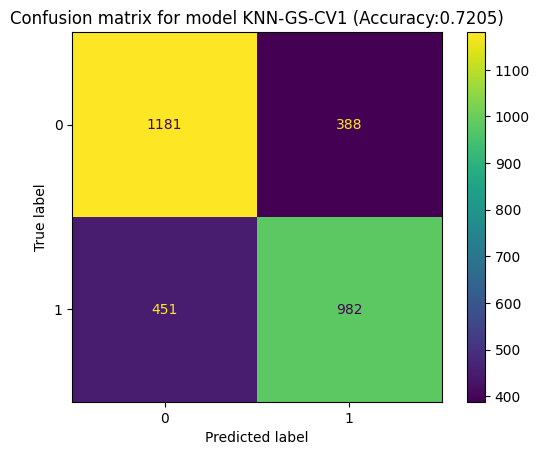

In [8]:
print("The parameters with the highest score: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
_ = calculate_metrics('KNN-GS-CV1', y_test, predictions)

In [9]:
import pandas as pd

cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Show top 10 parameters for this model => best parameters = no parameters :D
minimalistic_results = cv_results_df[['params', 'mean_test_score']]
sorted_results = minimalistic_results.sort_values(by='mean_test_score', ascending=False)

print(sorted_results.head(10))

                                         params  mean_test_score
8     {'n_jobs': -1, 'n_neighbors': 15, 'p': 1}         0.709098
20     {'n_jobs': 1, 'n_neighbors': 15, 'p': 1}         0.709098
16      {'n_jobs': 1, 'n_neighbors': 7, 'p': 1}         0.704599
4      {'n_jobs': -1, 'n_neighbors': 7, 'p': 1}         0.704599
21     {'n_jobs': 1, 'n_neighbors': 15, 'p': 2}         0.701684
9     {'n_jobs': -1, 'n_neighbors': 15, 'p': 2}         0.701684
22     {'n_jobs': 1, 'n_neighbors': 15, 'p': 3}         0.700850
10    {'n_jobs': -1, 'n_neighbors': 15, 'p': 3}         0.700850
23   {'n_jobs': 1, 'n_neighbors': 15, 'p': 4.3}         0.698768
11  {'n_jobs': -1, 'n_neighbors': 15, 'p': 4.3}         0.698768


In [ ]:
for i in range(10):

  params = sorted_results.iloc[i]['params']
  print("Parameters from place: ", i, " ", params)

  model = KNeighborsClassifier(**params)
  model.fit(X_train, y_train)

  predictions = model.predict(X_test)

  chosen_accuracy = accuracy_score(y_test, predictions)
  print("Accuracy for chosen parameters:", chosen_accuracy)

Parameters from place:  0   {'n_jobs': -1, 'n_neighbors': 15, 'p': 1}
Accuracy for chosen parameters: 0.7205196535642905
Parameters from place:  1   {'n_jobs': 1, 'n_neighbors': 15, 'p': 1}


In [12]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import expon, randint, uniform

parameter={'n_neighbors': np.arange(2, 30, 1)}

model = KNeighborsClassifier()
random_search = RandomizedSearchCV(estimator=model, param_distributions=parameter, n_iter=50, cv=4, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
best_model = random_search.best_estimator_

predictions = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average=None)

print("Accuracy for best parameters:", accuracy)
print("F1 score for best parameters:", f1)

Fitting 4 folds for each of 28 candidates, totalling 112 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 28 is smaller than n_iter=50. Running 28 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found:  {'n_neighbors': 11}
Accuracy for best parameters: 0.7128580946035976
F1 score for best parameters: [0.72978056 0.69367448]
